In [1]:
#Imports
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Apartado 2. Regresión Lineal Regularizada - Curva de Aprendizaje

In [2]:
#Hipotesis
def hipotesis(X, Theta):
    return Theta[0] + Theta[1] * X

In [3]:
# Funcion de coste
def cost_funct(Theta, X, y, Lambda):
    m = X.shape[0]
    h = np.dot(X, Theta)
    J = np.sum((h - y)**2)
    J = J/(2*m)
    reg_term = np.sum(Theta[1:]**2)
    reg_term = (reg_term*Lambda)/(2*m)
    J = J + reg_term
    return J

In [4]:
def gradient_funct(Theta, X, y, Lambda):
    #X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
    m = np.shape(X)[0]
    h = np.dot(X, Theta)
    grad = np.dot(X.T, h - y)
    grad = grad/m
    reg_term = (Lambda/m)*Theta
    grad = grad + reg_term
    return grad

In [5]:
def draw_graph(Theta, X, y):
    plt.scatter(X, y, marker = 'x', c = 'red')
    y = hipotesis(X, Theta)
    plt.plot(X, y, c='blue')
    plt.legend()
    plt.show()

In [6]:
def learning_curve(X, y, Lambda, Theta, Xval, yval):
    
    m1 = X.shape[0]
    m2 = Xval.shape[0]
    err1 = np.zeros(m1)
    err2 = np.zeros(m2)
    
    for i in range(1, X.shape[0] + 1):
        ThetasOpt = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient_funct, args=(X[0:i], y[0:i], Lambda))
        ThetasOpt = ThetasOpt[0]
        
        err1[i - 1] = error_calculation(ThetasOpt, X[0:i], y[0:i], m1)
        err2[i - 1] = error_calculation(ThetasOpt, Xval, yval, m2)
        
    return err1, err2

In [7]:
def error_calculation(Theta, X, y, m):
    h = np.dot(X, Theta[:, None])
    J = np.sum((h - y)**2)
    J = J/(2*m)
    return J

In [8]:
def draw_learning_curve(err1, err2):
    a = np.arange(len(err1))
    b = err1
    plt.plot(a, b, c="blue", label="Train")

    d = err2[0:len(err1)]
    plt.plot(a, d, c="orange", label="Cross Validation")

# Nuevo del apartado 3

In [9]:
def generate_new_training_data(X, p):
    newX = X
    for i in range(2, p + 1):
        #newX = np.hstack([newX, X ** i])
        newX = np.column_stack([newX, X ** i])
    return newX

In [10]:
def normalize_attributes(X, mean, std_des):
    X_norm = X - mean
    X_norm = X_norm / std_des
    return X_norm

In [11]:
def calcOptTheta(X, y, Lambda):
    Theta = np.zeros((X.shape[1], 1))
    
    def costFunction(Theta):
        Theta = Theta.reshape(-1, y.shape[1])
        cost = cost_funct(Theta, X, y, Lambda)
        grad = gradient_funct(Theta, X, y, Lambda)
        grad[0] = (1 / np.shape(X)[0]) * np.dot(X.T, np.dot(X, Theta) - y)[0]
        grad = grad.flatten()
        return cost, grad

    result = minimize(fun=costFunction, x0=Theta, method='CG', jac=True, options={'maxiter':200})
    
    return result.x

In [12]:
def pinta_regresion_Polinomial(X, p, Theta):
    x = np.array(np.arange(min(X) - 5,  max(X) + 6, 0.02))
    #Se genera nuevos datos de entrenamiento a partir de los datos originales X
    newX = generate_new_training_data(x, p)
    print("NewX:", newX)
    #Media
    mean = np.mean(newX, axis = 0)
    #Desviacion Estandar
    std_des = np.std(newX, axis = 0)
    #Se normalizan los atributos
    X_norm = normalize_attributes(newX, mean, std_des)
    #Se añade columna de 1s
    #newX = np.hstack([np.ones([X_norm.shape[0], 1]), X_norm])
    #Tambien se puede escribir: newX = np.insert(X_norm, 0, 1, axis=1)
    newX = np.insert(X_norm, 0, 1, axis=1)
    plt.plot(x, np.dot(newX, Theta))

In [13]:
def draw_points(X, y):
    plt.scatter(X, y, 100,  marker = 'x', c = 'red')

In [14]:
def main():
    
    #Cargamos los datos del fichero "ex5data1.mat'
    datafile = 'ex5data1.mat'
    mat = loadmat(datafile)
    
    X = mat.get("X")
    y = mat.get("y")
    
    Xval = mat.get("Xval")
    yval = mat.get("yval")
    
    print(X.shape, y.shape)
    print(Xval.shape, yval.shape)
    
    print(np.mean(X), np.std(X))
    print(np.mean(y), np.std(y))

    Lambda = 0
    #Grado del polinomio
    p = 8
    
    #Se genera nuevos datos de entrenamiento a partir de los datos originales X
    newX = generate_new_training_data(X, p)
    print("newX:", newX)
    #Media
    mean = np.mean(newX, axis = 0)
    #Desviacion Estandar
    std_des = np.std(newX, axis = 0)
    #Se normalizan los atributos
    X_norm = normalize_attributes(newX, mean, std_des)
    #Se añade columna de 1s
    newX = np.hstack([np.ones([X_norm.shape[0], 1]), X_norm])
    #Tambien se puede escribir: newX = np.insert(X_norm, 0, 1, axis=1)
    
    ThetasOpt = calcOptTheta(newX, y, Lambda)
    
    pinta_regresion_Polinomial(X, p, ThetasOpt)
    
    draw_points(X, y)
    plt.show
    
    #Se genera nuevos datos de entrenamiento a partir de los datos originales X
    newXval = generate_new_training_data(Xval, p)
    #Media
    #mean_val = np.mean(newXval, axis = 0)
    #Desviacion Estandar
    #std_des_val = np.std(newXval, axis = 0)
    #Se normalizan los atributos
    X_norm_val = normalize_attributes(Xval, mean, std_des)
    #Se añade columna de 1s
    newXval = np.hstack([np.ones([X_norm_val.shape[0], 1]), X_norm_val])
    
    #Theta = np.zeros((X.shape[1], 1))
    #err1, err2 = learning_curve(newX, y, Lambda, Theta, newXval, yval)
    #draw_learning_curve(err1, err2)
    
    #plt.show()
    

(12, 1) (12, 1)
(21, 1) (21, 1)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026
newX: [[-1.59367581e+01  2.53980260e+02 -4.04762197e+03  6.45059724e+04
  -1.02801608e+06  1.63832436e+07 -2.61095791e+08  4.16102047e+09]
 [-2.91529792e+01  8.49896197e+02 -2.47770062e+04  7.22323546e+05
  -2.10578833e+07  6.13900035e+08 -1.78970150e+10  5.21751305e+11]
 [ 3.61895486e+01  1.30968343e+03  4.73968522e+04  1.71527069e+06
   6.20748719e+07  2.24646160e+09  8.12984311e+10  2.94215353e+12]
 [ 3.74921873e+01  1.40566411e+03  5.27014222e+04  1.97589159e+06
   7.40804977e+07  2.77743990e+09  1.04132297e+11  3.90414759e+12]
 [-4.80588295e+01  2.30965109e+03 -1.10999128e+05  5.33448815e+06
  -2.56369256e+08  1.23208064e+10 -5.92123532e+11  2.84567638e+13]
 [-8.94145794e+00  7.99496701e+01 -7.14866612e+02  6.39194974e+03
  -5.71533498e+04  5.11034273e+05 -4.56939146e+06  4.08570215e+07]
 [ 1.53077929e+01  2.34328523e+02  3.58705250e+03  5.49098568e+04
   8.40548715e+05  1.28

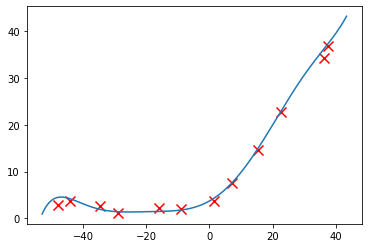

In [15]:
main()